# **06 스택**

## **06-1 스택 개념** 

스택의 어원은'쌓는다'이다. 먼저 입력한 데이터를 제일 나중에 꺼낼 수 있는 자료구조이다. 이렇게 먼저 들어간 것이 마지막에 나오는 규칙을 **<span style="color:yellow">후입선출 또는 LIFO라고 한다. 스택에 삽입하는 연산을 푸시(push), 꺼내는 연산을 팝(pop)이라고 한다.</span>**

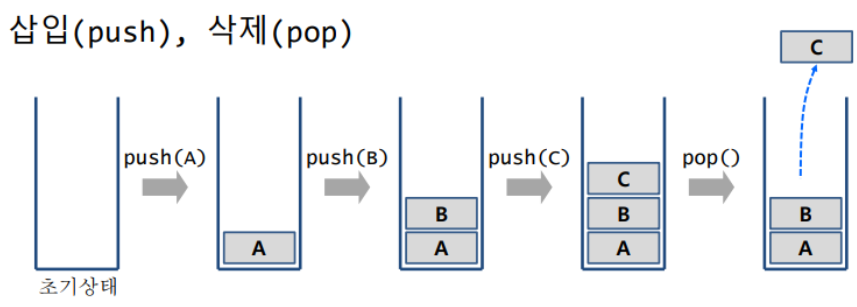

## **06-2 스택의 정의** 

ADT는 우리말로 추상 자료형인데, 추상 자료형이란 인터페이스만 있고 실제로 구현은 되지 않은 자료형이다. 일종의 자료혀으이 설계도라고 생각하면 된다.

### **스택의ADT**

우선 스택에는 push,pop, 가득 찼는지 확인(isFull),비었는지 확인(isEmpty)과 같은 연산을 정의해야 한다. 그리고 스택은 최근에 삽입한 데이터의 위치를 저장할 변수인 top도 있어야 한다. 

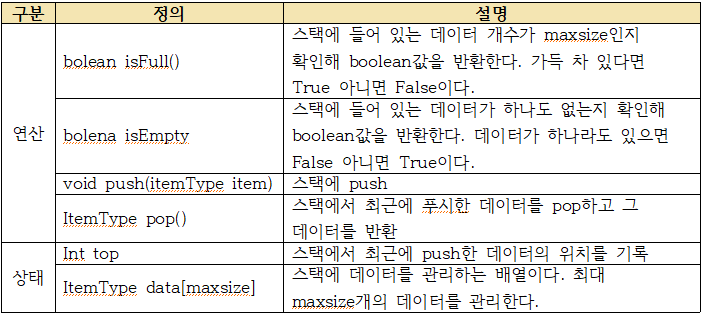

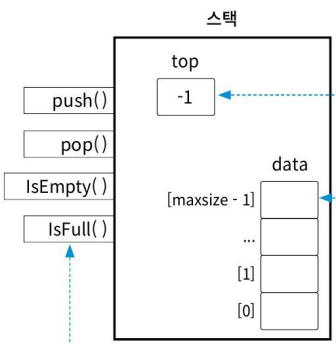  

위의 그림은 스택의 ADT를 나타낸 것이다. data 배열을 보면 최대 크기는 maxsize 이므로 인덱스의 범위는 0부터 maxsize -1 이다. top은 가장 최근에 추가한 데이터의 위치를 참조한다. 지금 그림에는 아무 데이터가 없으므로 top에 -1이 들어 있다. aksdp top이 0이면 데이터 1개 있는 것이다.

### **스택 세부 동작에 대해 조금 더 자세히 알아보기**

스택에 데이터를 추가하는 경우를 알아보자. 그림은 push(3)연산을 수행하며 데이터 3이 추가되는 모습을 보여준다.
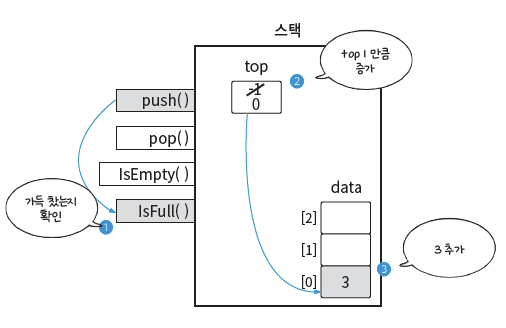  

연산 과정은 push(3)을 호출하면 내부적으로  **1)** isFull()을 수행해 우선 data 배열에 데이터가 가득 찼는지 확인하고 **2)** 그렇지 않다면 top을 1만큼 증가시킨 후 top이 가르키는 위치 **3)** data[0]dp 3을 추가한다.

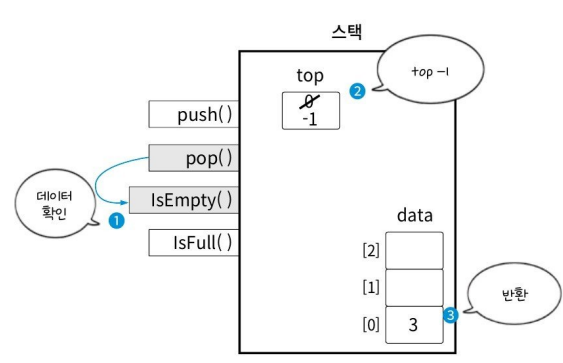  

반대로 pop()연산을 수행하면 내부적으로 **1)** isEmpty()함수를 우선 수행해 data 배열에 데이터가 없는 건 아닌지 확인하고, 데이터가 있다면 **2)**  top을 1만큼 감소시키고 **3)** 데이터 `3`을 반환한다. 여기서 `3`이 남아 있는데?라고 생각할 수도 있지만 top은 최근에 삽입한 데이터의 위치라고 했다. 즉 top이 가르키는 위치는 -1이므로 실제 배열에 데이터가 남아 있더라도 스택은 비어 있다고 봐도 된다.

### **스택 구현하기**

**<span style="color:yellow">데이터를 그냥 저장하고 순서와 상관 없이 임의 접근하기만 해도 되면 배열을 사용하면 되지만 최근에 삽입한 데이터를 대상으로 뭔가 연산해야 한다면 스택을 떠올리는 것이 좋다.</span>**

In [ ]:
stack = []

def push(stack,item):
    stack.append(item)
    print('데이터가 추가되었습니다.')
    
def pop(stack):
    if len(stack) == 0:
        print('스택이 비어 있습니다.')
        return None
    else:
        return stack.pop()

그런데 push()함수,pop()함수를 구현함 부분을 보면 실제 이 함수들이 하는 일은 리스트이 append()메서드, pop()메서드를 호출하는 것이 전부이다. 그러므로 push()함수와 pop()함수는 다음과 같이 구현하지 않아도 된다.

In [7]:
stack = []

stack.append(1)
stack.append(2)
stack.append(3)

top_element = stack.pop()
next_element = stack.pop()

stack_size = len(stack)

# top_element  = 3
# next_element = 2

스택은 개념 자체가 크게 어렵지 않다. 하지만 실전에 들어가 문제를 풀다 보면 스택을 몰라서 풀지 못하는지 것이 아니라 <span style="color:yellow">'이 문제는 스택을 활용해야 풀 수 있다.'</span>라는 생각 자체를 못해서 풀지 못하는 경우가 대부분 이다.**<span style="color:red">따라서 스택 관련 문제를 많이 풀어보며 '이 문제는 스택을 사용하는 게 좋겠다'</span>** 라는 감을 익히기를 권한다.

## **06-3 몸풀기 문제** 

### 1) 괄호 짝 맞추기

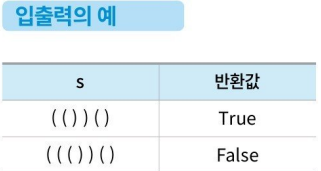

#### **문제 분석하고 풀기**

이런 괄호 짝 맞추기를 해결하려면 어떻게 해야 할까? 바로 스택을 사용하면 된다. **<span style="color:yellow">닫힌 괄호가 임의 위치의 열린 괄호와 상쇄되는 것이 아니라 닫힌 괄호가 나오기 바로 전의 즉, 가장 가까운(최근)열린 괄호와 상쇄된다는 것이다.</span>** **<span style="color:red">가장 가까운(최근)</span>** 이라는 키워드를 보고 **<span style="color:red">스택</span>** 을 떠올리는 감각이 있어야 한다.

1. 문자열을 앞에서 하나씩 보며 열린 괄호가 나오면 push
2. 닫힌 괄호가 나오면 pop연산을 통해 문자열에서 열린 괄호, 닫힌 괄호 한 쌍을 상쇄
3. 1~2를 마지막 문자열 까지 반복해 스택에 열린 괄호가 남아 있다면 FALSE, 남아있지 않다면 True

### 괄호의 짝이 맞는 경우

- 1단계  

1. 크기아 6인 배열에 괄호를 배치하고 스택을 준비한다. 
2. 인덱스 0은 열린 괄호 이므로 스택에 push하고 다음을 본다.
3. 다음의 값은 닫힌 괄호이므로 스택에서 pop하고 다음을 본다. 

- 2단계  

 1. 인덱스 2는 열린 괄호 이므로 push하고 다음을 본다.
 2. 인덱스 3은 열린 괄호 이믈로 push하고 다음을 본다.
 3. 이번에는 닫힌 괄호 이므로 스택에서 pop을 하고 다음을 본다.
 4. 인덱스 5는 닫힌 괄호 이므로 pop하고 연산을 머친다.  

### 괄호의 짝이 맞지 않는 경우

- 1단계  

1. 처음은 열린 괄호 이므로 push하고 다음을 본다.

- 2단계  

 2. 인덱스 1은 닫힌 괄호이므로 팝하고 다음을 본다.
 3. 인덱스 2는 열린 괄호이므로 push한다.

In [3]:
s = '((())()'

stack = []

for i in s:
    if i == '(':
        stack.append('(')
    elif i == ')':
        if not stack:
            print(False)
        else:
            stack.pop()

# if len(stack) > 0:
#     print(False)
# else:
#     print(True)

if not stack:
    print(True)
else:
    print(False)

False


시간 복잡도는 O(N)

### 2) 10진수를 2진수로 변환하기

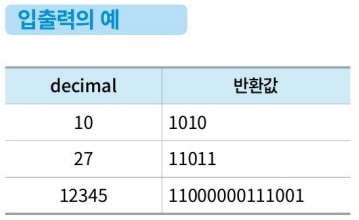 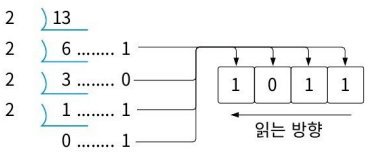


#### **문제 분석하고 풀기**

1. 10진수 N을 2로 나눈 나머지, 즉 %2 연산을 한 값을 저장하고 N은 2로 나눔
2. 몫이 0이 아니라면 나머지를 버리고 다시 1을 수행
3. 모든 과정리 끝나고 1에서 저장한 수를 뒤부터 순서대러 가져와 붙이기

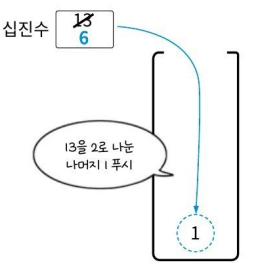 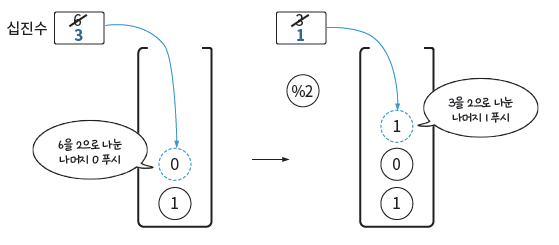 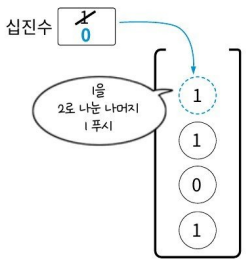 

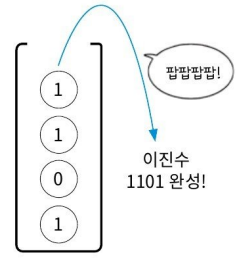

In [34]:
decimal = 10 # 1010

stack = []

while decimal > 0 :
    stack.append(str(decimal % 2))
    decimal = decimal // 2
  
b = ''

while stack:
    b += stack.pop()

print(b)


1010


N은 이진수로 변환할 숫자이다. N을 이진수로 변환하는 과정은 N이 1이 될 때까지 2로 계속 나누므로 O(logN)이다. 하지만 문자열의 += 연산자는 수행할 때마다 객체를 새로 생성한다. 따라서 시간 복잡도는 $O((logN)^2)$

## **06-4 합격자가 되는 모의 테스트** 

### 3) 괄호 회전하기

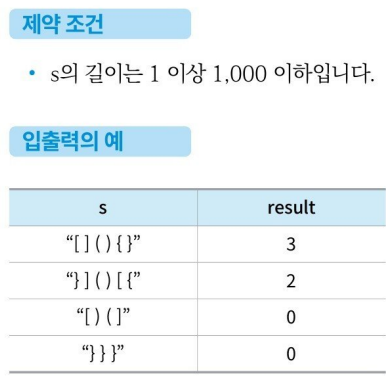

#### **문제 분석하고 풀기**

문자열 회전은 각각의 괄호 문자를 왼쪽으로 한 칸씩 밀고,맴 앞의 괄호 문자를 맨 뒤로 보내면 된다.  
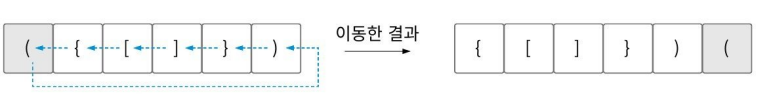  

**<span style="color:yellow">'스택을 사용해야 겠군 이라는'아이디어가 바로 떠오르지 않는다면 간단한 입력 값을 놓고 출력값이 어떻게 나오는지 손으로 그려 가면서 스택에 대한 힌트를 얻는 방법도 있다. 여기서 핵심은 닫힌 괄호를 처음 보는 순간 가장 마지막에 찾았던 같은 모양의 열린 괄호를 찾을수 있어야 한다는 것이다.</span>**  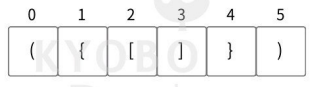  

지금의 경우 인덱스 3의 대괄호가 처음 보는 닫힌 괄호이고, 마지막에 찾았던 열린 대괄호는 인덱스 2에 있다. 그다음에는 해당 열린 괄호 바로 직전에 찾았던 열린 괄호를 찾을 수 있어야 한다. 즉 열린 괄호를 관리하는 방법은 스택이 가장 적합하다는 걸 알 수 있다.

In [10]:
s = '[](){}'

answer = 0
n = len(s)

for i in range(n):
    stack = []
    for j in range(n):
        # 1) 괄호 문자열을 회전시키면서 참조
        c = s[(i+j) % n]
        if c == '(' or c == '[' or c == '{': #2) 열린 괄호는 push:
            stack.append(c)
        else:
            if not stack: #3) 짝이 맞지 않는 경우
                break
                   
           # 4) 닫힌 괄호는 스택의 top과 짝이 맞는지 비교
            if c == ')' and stack[-1] == '(':
                stack.pop()
            elif c == ']' and stack[-1] == '[':
                stack.pop()
            elif c == '}' and stack[-1] == '{':
                stack.pop()
            else:
                break
    else: # 5) for문이 break에 의해 끝나지 않고 끝까지 수행된 경우
        if not stack:
            answer += 1
print(answer) 

(1) 문제에서 문자열의 문자를 왼쪽으로 밀면서 이동한다고 했다. 이는 맨 앞에 문자는 맨 뒤로 가는 것과 같다. 다만 구현 부분에서 진짜 문자열을 회전시키면 연산 비용이 많이 드므로 인덱스를 활용하였다. 즉 i를 첫 번째 문자의 위치를 가리키는 값이라 생각해 회전을 간단히 구현 하였다. j는 i 이후 등장하는 등장하는 문자를 가리키는 인덱스 이다.   
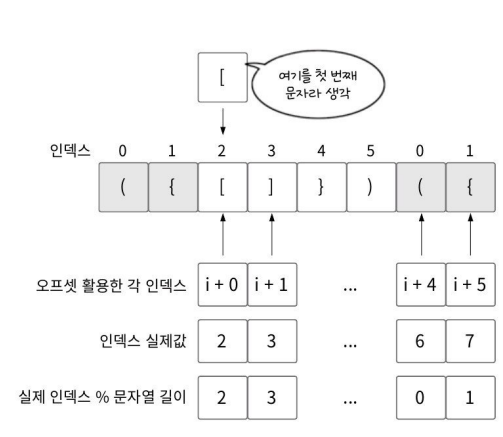  

다음 그림은 i = 2 즉 3번째 문자를 첫 번째 문자라고 치자. i를 기준으로 다음 문자를 하나씩 가르킨다. 이때 다음 문자를 계산하기 위한 값을 오프셋이라 부르고, 이 오프셋 역활을 하는 것이 j이다, 즉 i+j와 같은 방법으로 첫 번째 (j=0),두 번째(j =1)값을 표현한다. 그리고 회전 시킨 배열에서의 j번째 값의 위치를 표현하기 위해 (i+j)%n 과 같이 모듈러 연산을 해준다. 예를 들어 i = 2,j =4 라면 논리상으로는 4변쨰 값인 '(' 실제 배열에 서는 인덱스 0을 가리켜야 한다, 이렇게 하면 회전 구현은 끝이다. 

(3) c는 현재 참조하는 문자이다. 닫는 괄호를 참조할 때 스택에 아무 값도 없으면 닫는 괄호와 짝을 맞출 요는 괄호가 아예 없다는 뜻이다. 그러면 검색을 중단하고 다음 회전 문자열을 확인하디 위해 for문을 빠저 나간다.

(4) 는 c가 참조한 닫힌 괄호가 있을 때 스택에 여는 괄호가 있는 경우이다. 이 경우 최근 여는 괄호, 즉 스택의 top위치 (stack[-1])의 괄호와 짝이 맞는지 비교한다. 짝이 맞으면 pop연산을 수행한다. 

(5)는 파이썬에는 for-else문이 있다. else문은 for문이 끝까지 실행되었을 떄 동작한다. 이 문제에서 괄호의 모든 짝이 맞으면 실행된다. 즉 모든 짝이 맞는 문자열마다 answer를 1만큼 증가시킨다.

#### **시간 복잡도 분석하기**

N은 s의 길이이다. 회전한 괄호 문자열의 유효성을 체크할 때 이중 반복문을 활용하므로 시간 복잡도는 $O(N^2)$ 이다. 괄호 쌍을 확인할 때  append()메서드와 pop()메서드의 시간 복잡도는 O(1)이다.

### **4) 짝지어 제거하기**

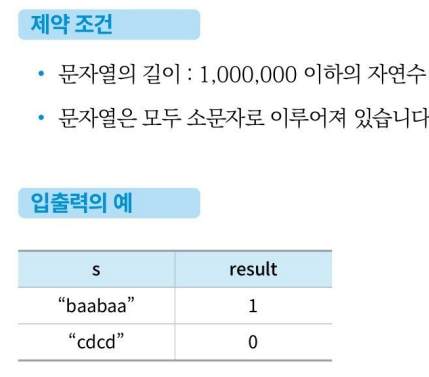

#### 문제 분석하고 풀기

문자열 문제를 처음 보는 많은 사람이 이중 반복문으로 문제를 해결하려고 하는 경우가 많다. 하지만 문자의 길이를봐야 한다. 문자열의 길이는 최대 100만이므로 이중 반복문, 즉 시간 복잡도가 $O(N^2)$ 인 알고리즘으로 접근하면 무조건 시간 초과가 발생한다. 이 문제는 시간 복잡도가 O(N)인 알고리즘을 적용해야 한다.  

현재 가리키고 있는 문자가 i번째라면 다음 문자는 i+1번째 이므로 이 둘의 비교한다. 이를 거꾸로 생각해 i+1번째 문자 입장으로 이야기 하면 바로 직전문자, 즉 최근 문자와 비교한다고 생각할 수 있다. 이는 스택 구조와 맞아 떨어진다. 그리거 문제 요구 사항인 짝이 맞는 문자를 제거한 다음 **문자열을 붙이는 연산은 pop연산으로 자연스럽게 해결할 수 있으므로 구현시 고려할 필요가 없다.**


In [4]:
s = 'baabaa'

stack =[]

for i in s:
    if stack and stack[-1] == i: # 스택이 비어 있지 않고, 현재 문자와 스택의 맨 위 문자가 같으면 
        stack.pop()# 스택의 맨 위 문자 제거
    else:
        stack.append(i) # 스택에 현재 문자 추가

print(int(not stack)) # 스택이 비어 있으면 1, 그렇지 않으면 0 반환

1


#### 시간 복잡도 분석하기

N은 s의 길이다. 문자열의 모든 문자를 한 번씩 순회 하므로 시간 복잡도는 O(N)

### **5) 주식 가격** - 다시 보자

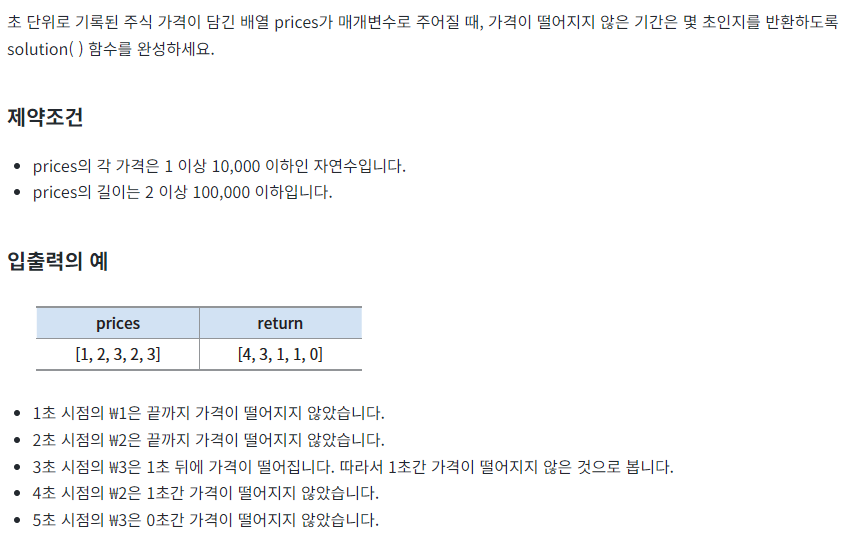

#### 문제 분석하고 풀기

이 문제는 정확성 테스트와 효율성 테스트가 있어서 전략적인 접근이 필요하다. 문제를 보자마자 prices의 길이가 최대 10만이으므로 $O(N)$ 알고리즘이 필요하다는 것을 알았다. 하지만 별다른 알고리즘이 떠오르지 않는다면 $O(N^2)$ 알고리즘으로 코드를 구현해 본다.

1. 현재 주식보다 이전 주식의 가격이 높으면 이전 주식의 길이를 확정한다.
2. 이전 주식들을 하나씩 보고 현재 주식 가격 보다 큰 주식 가격이 있다묜 그 주식의 길이를 확정한다.
3. 길이를 확정한 주식은 이후 계산에서 제외한다.

**길이를 확정한 주식은 이후 계산에서 제외하기가 연산 줄이기의 핵심이다.** 결국 스택에 남는 원소는 길이를 확정하지 않은, 다시 말해 가격이 끝까지 떨어지지 않는 주식이다.

In [7]:
prices = [1,2,3,2,3]
n = len(prices)
answer = [0] * n  # ➊ 가격이 떨어지지 않은 기간을 저장할 배열

  # 스택(stack)을 사용해 이전 가격과 현재 가격을 비교
stack = [0]  # ➋ 스택 초기화
for i in range(1, n):
    while stack and prices[i] < prices[stack[-1]]:
      # ➌ 가격이 떨어졌으므로 이전 가격의 기간을 계산
      j = stack.pop( ) 
      answer[j] = i - j
    stack.append(i)
  # ➍ 스택에 남아 있는 가격들은 가격이 떨어지지 않은 경우
while stack:
    j = stack.pop( ) 
    answer[j] = n - 1 - j
print(answer)

[4, 3, 1, 1, 0]


1)가격이 떨어지지 않는 기간을 저장할 배열 asnwer를 선언  

2)인덱스를 저장할 스택을 선언한다. 보통 스택은 빈 스택을 선언하는 것이 일반적이지만 0을 넣어 선언함
  
3)각 prices[i]에 대해 prices[stack[-1]]와 비교한다. 비교 결과 prices[i]가 더 작은 경우가 주식의 가격이 떨어지는 
순간이다.이때 prices[stack[-1]]의 길이를 확정하고pop을 한다. 이후에도 동일한 조건에도 비교해서 True면 pop을 한다.  

4)모든 과정이 끝났을 떄 stack에 끝까지 남은 인덱스에 해당하는 가격들은 끝까지 가격이 떨어지지 않는다고 볼 수 있다.

#### 시간 복잡도 구하기

N은 prices의 길이이다. 최악의 경우 각 prices의 원소들은 한 번씩 push/pop하므로 시간복잡도는 O(N)이다.

### **6) 크레인 인형 뽑기 게임**

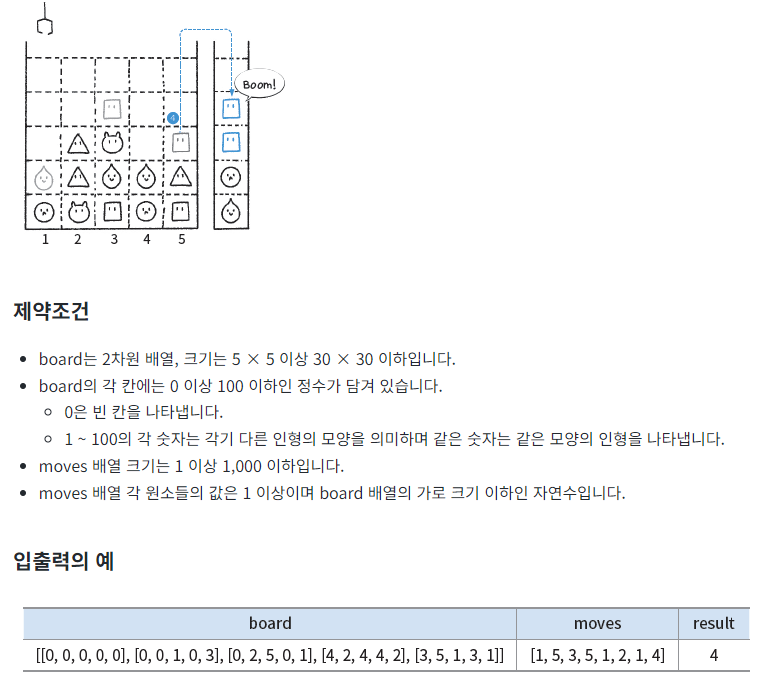

#### 문제 분석하고 풀기

'<span style="color:yellow">**격자의 가장 아래 칸부터 차곡차곡 쌓여 있고</span>** 가장 위에 있는 인형을 집어올릴 수 있다.'  
'집어올린 인형은 비구니에 **<span style="color:yellow">쌓이는데</span>**'  
'바구니의 가장 아래 칸부터 인형이 **<span style="color:yellow">순서대로 쌓인다.</span>**'  


바구니의 동작을 설명할 때 스택을 임시하는 키워드를 볼 수 있다.  

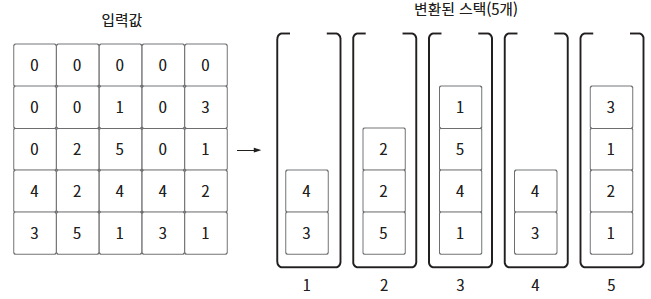

그리모가 같이 board 배열을 스택으로 변환시켜야 한다. 이때 값이 0이면 공백이므로 스택에push하지 않는다. 

1. 바구니가 빈 경우
 - 1-1 무조건 push한다.
2. 바구니가 비지 않는 경우
 - 2-1 바구니가 가장 최근에 넣은 인형과 지금 넣으려고 하는 인형이 같은지 비교
 - 2-1-1 같다면 스택에 있는 원소를 pop하고 사라진 인형은 count한다.
 - 2-1-2 같지 않다면 인형을 넣는다.
3. 마지막에 스택의 길이를 출력한다.

In [19]:
board = [[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]
moves = [1,5,3,5,1,2,1,4]


# ➊ 각 열에 대한 스택을 생성합니다.
lanes = [[ ] for _ in range(len(board[0]))]

# ➋위의 그림으로 나타내기 위해 board를 역순으로 탐색하며, 각 열의 인형을 lanes에 추가합니다.
for i in range(len(board) - 1, -1, -1):
  for j in range(len(board[0])):
    if board[i][j]:
      lanes[j].append(board[i][j]) # 위의 변환된 스택을 나타내는 lanes

  # ➌ 인형을 담을 bucket을 생성합니다.
bucket = [ ]

  # ➍ 사라진 인형의 총 개수를 저장할 변수를 초기화합니다.
answer = 0

  # ➎ moves를 순회하며, 각 열에서 인형을 뽑아 bucket에 추가합니다.
for m in moves:
  if lanes[m - 1]:  # 해당 열에 인형이 있는 경우
    doll = lanes[m - 1].pop( ) 

    if bucket and bucket[-1] == doll:  # ➏ 바구니에 인형이 있고, 가장 위에 있는 인형과 같은 경우
      bucket.pop( ) 
      answer += 2
    else:  # ➐ 바구니에 인형이 없거나, 가장 위에 있는 인형과 다른 경우
      bucket.append(doll)

print(answer)

4


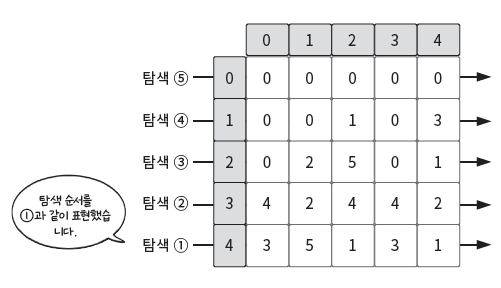  

➋ 
```py
for i in range(len(board) - 1, -1, -1):
  for j in range(len(board[0])):
    if board[i][j]:
      lanes[j].append(board[i][j]) # 위의 변환된 스택을 나타내는 lanes
```
1. 각 열은 독립적인 스택으로 관리해야 한다.
2. 스택은 LIFO 이므로 밑에있는 인형부터 스택에 push해야 한다.
3. 배열의 값이 0인 경우는 인형이 없는 빈칸이므로 스택에 push하지 않는다.


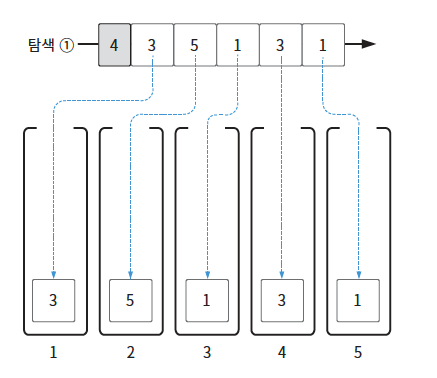

#### 시간 복잡도 분석하기

N은 board의 행 혹은 열의 길이고,M은 moves의 길이이다. board를 순회하는 과정은 $O(N^2)$, moves를 순회하는 과정은 O(M)이므로 시간 복잡도는 $O(N^2 + M)$ 이다 하지만 N은 최대 30이고 M은 최대 1,000이므로 O(M) 혹은 O(N2)으로 봐도 문제가 없다. 최악의 경우에도 연산 횟수는 대략 302 + 1,000이므로 1,900번 정도로, 시간 복잡도가 딱히 의미가 없는 문제다.